# Seaborn
Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.
On Seaborn's official website, they state:

If matplotlib "tries to make easy things easy and hard things possible", seaborn tries to make a well-defined set of hard things easy too. "


Using default themes that are aesthetically pleasing.
Setting custom color palettes.
Making attractive statistical plots.
Easily and flexibly displaying distributions.
Visualizing information from matrices and DataFrames.

Those last three points are why Seaborn is our tool of choice for *Exploratory Analysis. It makes it very easy to “get to know” your data quickly and efficiently.


In [13]:
# importing pandas
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

In [14]:
df = pd.read_csv('sample_data/Pokemon.csv', index_col=0) ## index will be colomn 0
df_tips = sns.load_dataset('tips')

In [15]:
df.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
55,Golduck,Water,NaN,500,80,82,78,95,80,85,2,False
57,Primeape,Fighting,NaN,455,65,105,60,60,70,95,2,False
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
91,Cloyster,Water,Ice,525,50,95,180,85,45,70,2,False
24,Arbok,Poison,NaN,438,60,85,69,65,79,80,2,False


In [4]:
df_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
54,25.56,4.34,Male,No,Sun,Dinner,4
24,19.82,3.18,Male,No,Sat,Dinner,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2


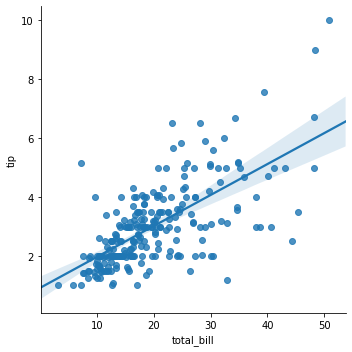

In [5]:
# Recommended way
# sns.lmplot(x='Attack', y='Defense', data=df)
sns.lmplot(x='total_bill', y='tip', data=df_tips)


# Ploting - Scatter plot

- First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
- Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

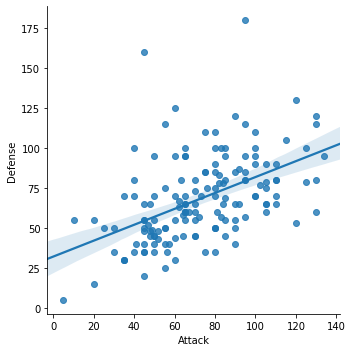

In [16]:
sns.lmplot(x='Attack', y='Defense', data=df) ## using colomn name

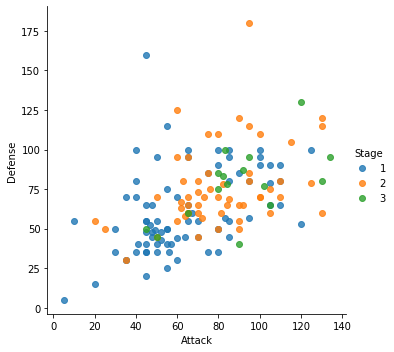

In [17]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

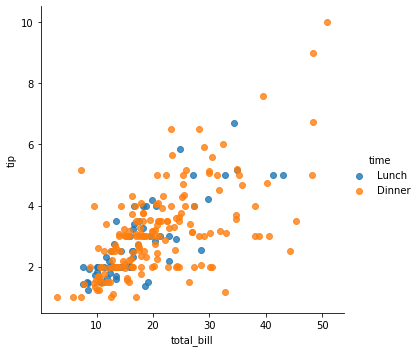

In [18]:
sns.lmplot(x='total_bill', y='tip', data=df_tips,
           fit_reg=False, # No regression line
           hue='time')   # Color by evolution stage

(0, 141.9881096001028)

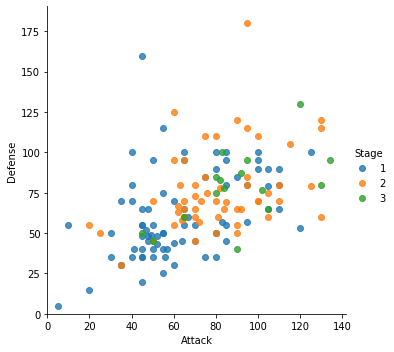

In [7]:
# Customizing with MatplotlibPython

# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## countplot

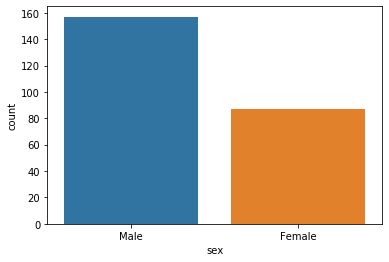

In [19]:
sns.countplot(x='sex', data=df_tips)


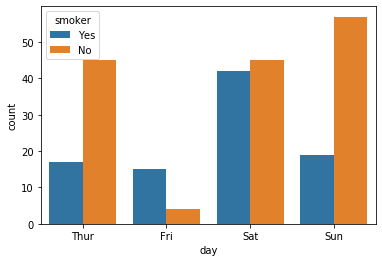

In [20]:
sns.countplot(x='day', hue='smoker', data=df_tips)

## Histograms 

It allow you to plot the distributions of numeric variables.

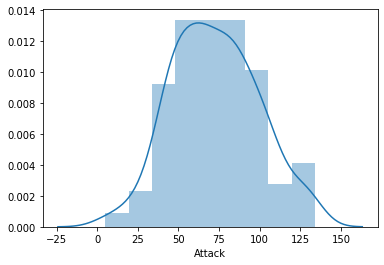

In [21]:
sns.distplot(df.Attack)


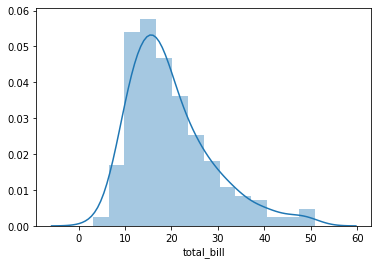

In [22]:
sns.distplot(df_tips.total_bill)


# Boxplot

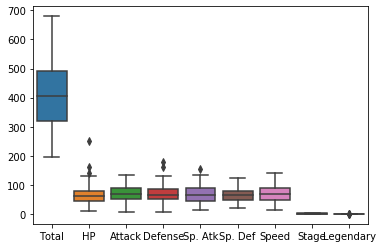

In [23]:

# Boxplot
sns.boxplot(data=df)
# help(sns.boxplot)

In [33]:
## removing total, stage, and legendary from the data
df_new = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

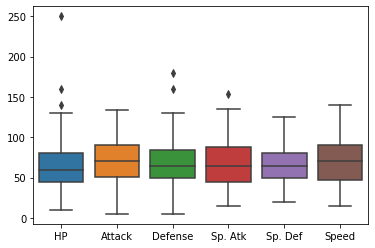

In [12]:
sns.boxplot(data=df_new)

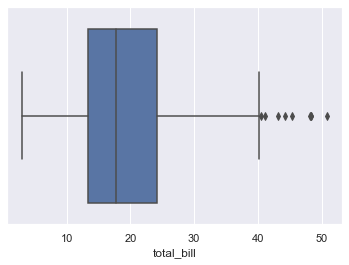

In [44]:
sns.boxplot(x=df_tips["total_bill"])

In [28]:
x.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

## violinplot

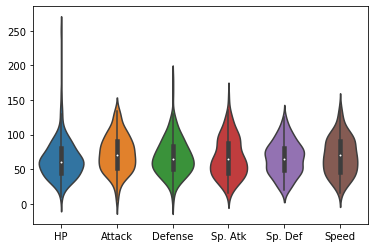

In [17]:
sns.violinplot(data=df_new)

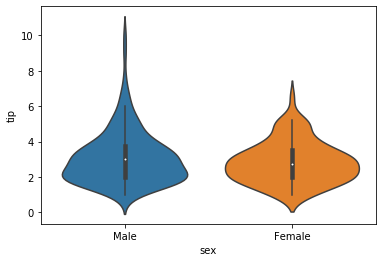

In [20]:
sns.violinplot(y='tip', x='sex', data=df_tips)

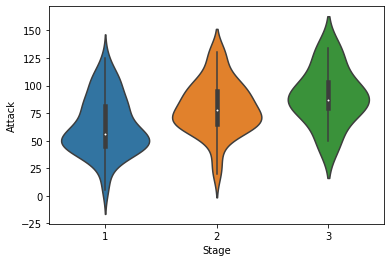

In [22]:
sns.violinplot(x='Stage', y='Attack', data=df)

In [12]:
# sns.boxplot(x='Stage', y='Attack', data=df)

## Seaborn Theme

Another advantage of Seaborn is that it comes with decent style themes right 
out of the box. The default theme is called 'darkgrid'.

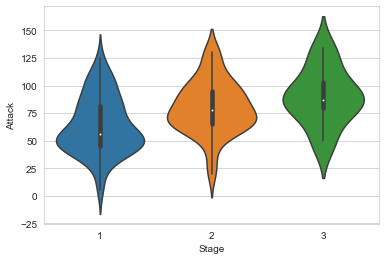

In [24]:

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Stage', y='Attack', data=df)

## Color Palettes

Seaborn allows us to set custom color palettes.
We can simply create an ordered Python list of color hex values.

In [29]:

colors1 = ['green',  # Grass
                    'red',  # Fire
                    'blue',  # Water
           ]

colors2 = [
                    'white',  # Ghost
                    'orange',  # Ice
                    '#7038F8',  # Dragon
          ]

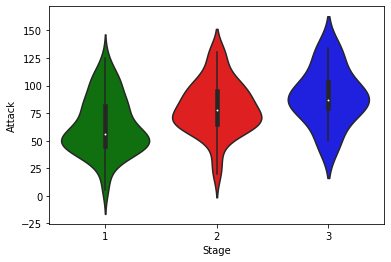

In [25]:
sns.violinplot(x='Stage', y='Attack', palette=colors1, data=df)

## swarmplot

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in
our dataset, we may want to simply display each point.



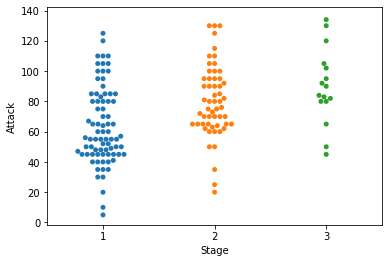

In [26]:
sns.swarmplot(x='Stage', y='Attack', data=df)

## Overlaying plots

Text(0.5, 1.0, 'Attack by Stage')

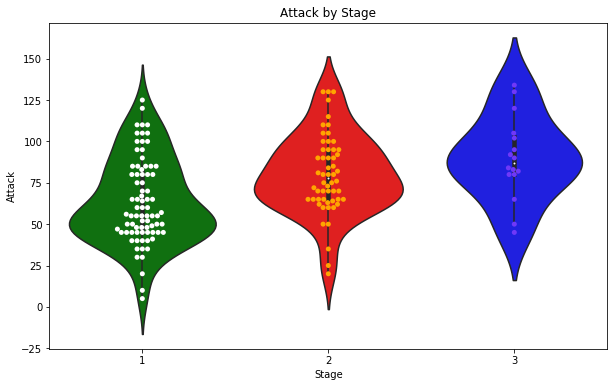

In [30]:

# Set figure size with matplotlib
plt.figure(figsize=(10,6))

sns.violinplot(x='Stage', y='Attack', palette=colors1, data=df)
sns.swarmplot(x='Stage', y='Attack', palette=colors2, data=df)

plt.title('Attack by Stage')

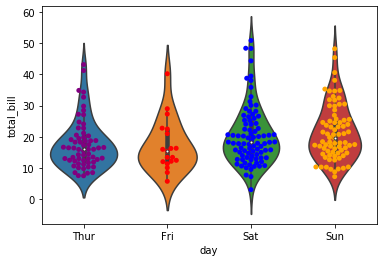

In [31]:
colors = ['purple', 'red','blue', 'orange']

sns.swarmplot(x='day', y='total_bill' , palette=colors, data=df_tips)
sns.violinplot(x='day', y='total_bill', data=df_tips)

In [42]:
df_new.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


In [40]:
corr = df_new.corr()
df_heat = pd.DataFrame({"a":[2,5,6,7],"b":[4,5,5,7]},index=['x','y','p','q'])

# sns.heatmap(df_heat)

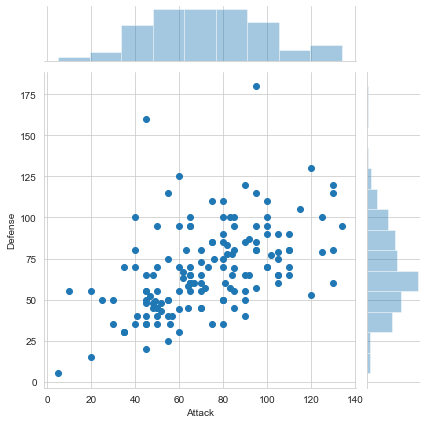

In [51]:
## Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)